(This notebook is based off Zach Alexander's, with some minor modifications.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [2]:
cars = pd.read_csv('DATA/cars_multivariate.csv')

You just received a bunch of data... what's your first move?

Start with a very high level overview
- What do the first few rows look like?
- What feature does each column denote?
- Which features are categorical and what is the distribution for the categorical levels?
- Which features are continuous and how would I characterize the distribution?
- Are there any missing values?
- What is the target denote? What is the target's distribution look like?
- How does the features relate to one another?
- How does each feature relate to the target?

In [3]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [4]:
cars.shape

(398, 9)

In [5]:
cars.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [6]:
cars.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10


In [7]:
cars.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Do the variable types make sense? Notice that HP has variable type 'object' - this doesn't seem right.

In [9]:
cars['horsepower'].tail()

393    86.00
394    52.00
395    84.00
396    79.00
397    82.00
Name: horsepower, dtype: object

All the values that we can see look like numbers. If they were all numbers, Pandas should have figured out the correct data type---there must be a weird value in there somewhere

In [10]:
# Force convert horsepower to numeric
conv = pd.to_numeric(cars['horsepower'], 'coerce')
conv

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [13]:
mask = conv.isna()
mask

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: horsepower, Length: 398, dtype: bool

In [14]:
# Check out the six bad values of horsepower
cars[conv.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [48]:
#let pandas do the heavy lifting for you. 
#optional arguments on read_csv let you deal with missing values

In [ ]:
#Let's start over!!

In [15]:
# Reload the data, but now tell pandas to treat '?' as missing
#Notice that Horsepower is now a numeric column with six missing values.
cars = pd.read_csv('DATA/cars_multivariate.csv', na_values=['?'])

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [16]:
# Look at the dataset and drop rows where horsepower is notna

cars[cars.horsepower.notna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model         392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [17]:
#From here forward, we'll just drop those six rows with no horsepower data
cars = cars[cars.horsepower.notna()]
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model         392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [18]:
# What about origin? model?
#cars.origin.value_counts()
cars['model'].value_counts()

73    40
78    36
76    34
82    30
75    30
79    29
70    29
81    28
77    28
72    28
80    27
71    27
74    26
Name: model, dtype: int64

In [19]:
cars['origin'] = cars['origin'].astype(str)
cars['model'] = cars['model'].astype(str)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model         392 non-null    object 
 7   origin        392 non-null    object 
 8   car_name      392 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 30.6+ KB


Our data set has 5-6 numeric variables and 3-4 categorical variables (cylinders is kind of a wild card). Sometimes it is good to keep track of these:

In [90]:
numeric_vars = ['mpg','displacement','horsepower','weight','acceleration']
categorical_vars = ['model', 'origin', 'cylinders','car_name']

## More Exploration

### Univariate-Numeric Viz

In [ ]:
### seaborn plotting

In [39]:
import seaborn as sns

In [47]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car_name', 'binned_acceleration'],
      dtype='object')

In [52]:
x = cars['horsepower'].values

In [53]:
sns.set(rc={'figure.figsize': (16,3)})

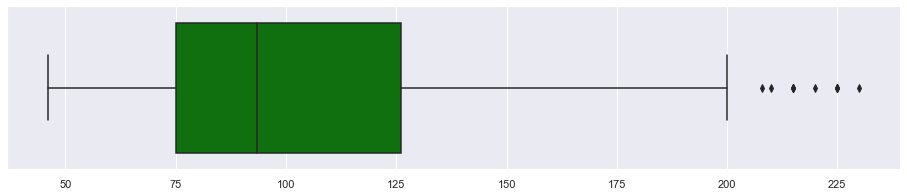

In [55]:
sns.boxplot(x, color = 'green')

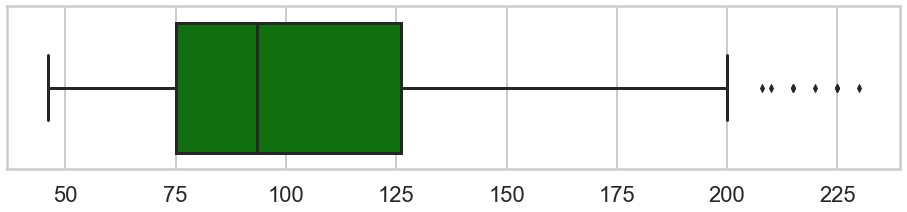

In [58]:
sns.set(rc={'figure.figsize': (16,3)})
sns.set_style("whitegrid")
sns.set_context("poster")


sns.boxplot(x,color = 'green')

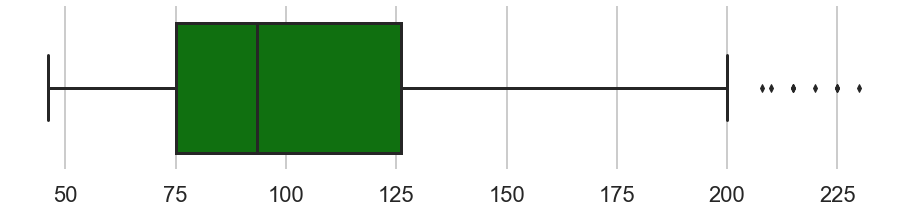

In [60]:
sns.boxplot(x, color = 'green')
sns.despine(left=True, bottom = True)

In [ ]:
## Graph as a bar chart with matplotlib vs Seaborn

In [67]:
#info pulled down to not have to go all the way to top
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   mpg                  392 non-null    float64 
 1   cylinders            392 non-null    int64   
 2   displacement         392 non-null    float64 
 3   horsepower           392 non-null    float64 
 4   weight               392 non-null    float64 
 5   acceleration         392 non-null    float64 
 6   model                392 non-null    object  
 7   origin               392 non-null    object  
 8   car_name             392 non-null    object  
 9   binned_acceleration  392 non-null    category
dtypes: category(1), float64(5), int64(1), object(3)
memory usage: 31.4+ KB


In [65]:
#info pulled down to not have to go all the way to top
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,binned_acceleration
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,"(10.4, 12.8]"
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,"(10.4, 12.8]"
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,"(10.4, 12.8]"
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,"(10.4, 12.8]"
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,"(10.4, 12.8]"
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,"(15.2, 17.6]"
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,"(22.4, 24.8]"
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,"(10.4, 12.8]"
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,"(17.6, 20.0]"


In [61]:
#info pulled down to not have to go all the way to top
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car_name', 'binned_acceleration'],
      dtype='object')

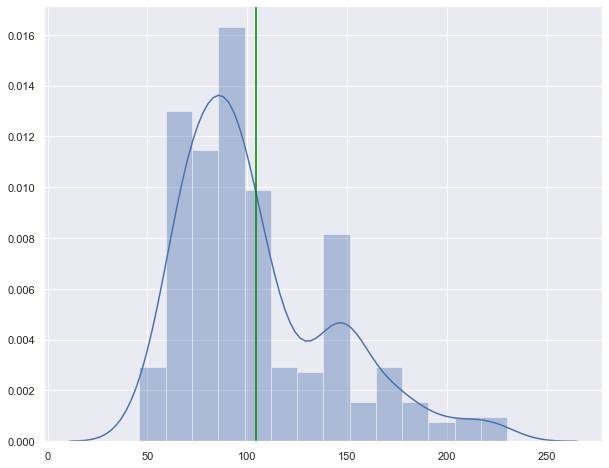

In [127]:
# bar and mean for horsepower.  This is how to do one column value

#sns.set(rc={'figure.figsize': (10,5)})
x = cars['horsepower'].values
mean = cars['horsepower'].mean()

sns.distplot(x)

plt.axvline(mean,0, 1, color = 'green')


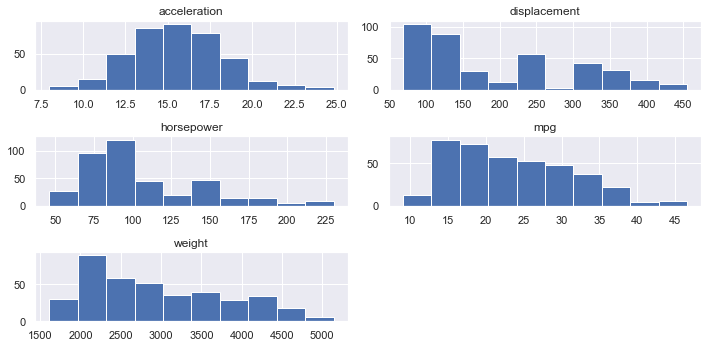

In [98]:
# Histograms with Seaborn
numeric_vars = ['mpg','displacement','horsepower','weight','acceleration']
ax = cars[numeric_vars].hist(bins=10)
plt.tight_layout()


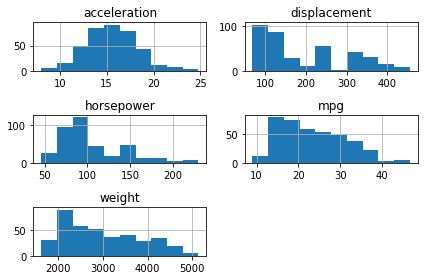

In [28]:
# Histograms with matplotlib
ax = cars[numeric_vars].hist(bins=10)
plt.tight_layout()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

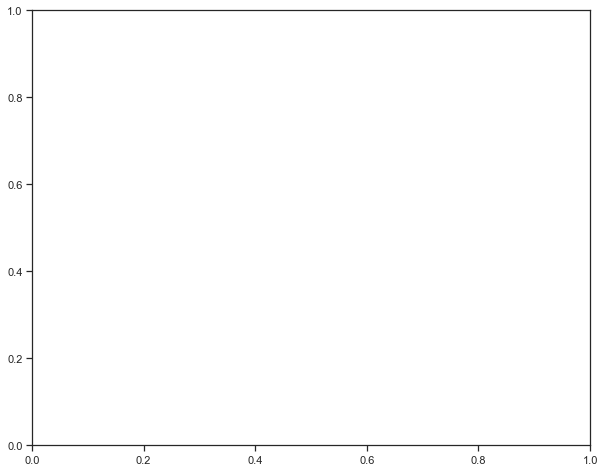

In [139]:
### try to find this in seaborn_tuorials
sns.set_style('ticks')
agg = cars.groupby(['origin','model'])['mpg'].mean()
ax = sns.boxplot(x = 'origin', y = 'model', data = cars)

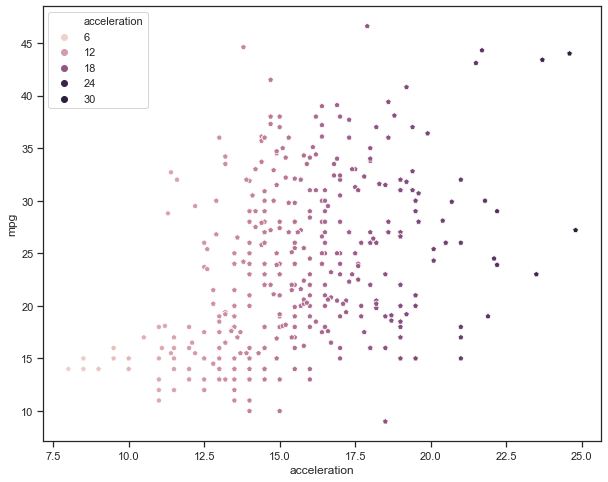

In [138]:
### scatter using seaborn
scatt = sns.scatterplot(x = 'acceleration', y='mpg', data=cars,
                        hue = 'acceleration',
                        marker="p")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


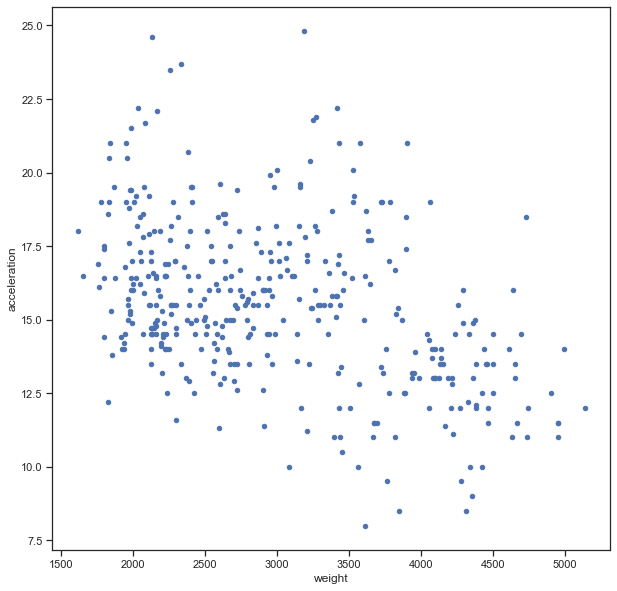

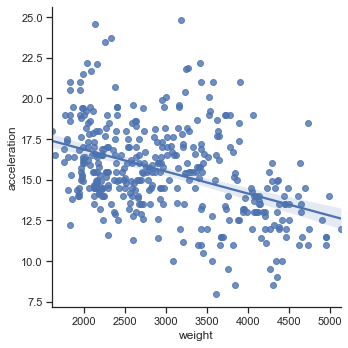

In [146]:
cars.plot('weight','acceleration', kind = 'scatter', figsize = (10,10))
sns.lmplot(x = 'weight', y= 'acceleration', data = cars)

/Users/galvanize/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


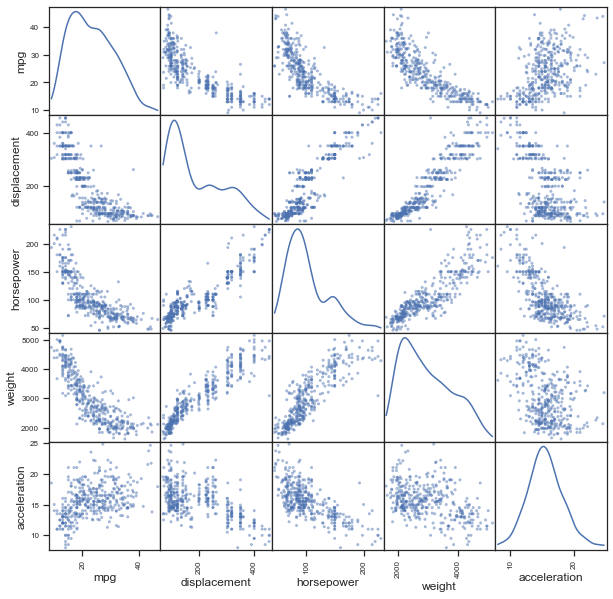

In [150]:
from pandas.plotting import scatter_matrix
fig, ax = plt.subplots(1, 1, figsize =(10,10))
ax = scatter_matrix(cars[numeric_vars], ax=ax, diagonal = 'kde')

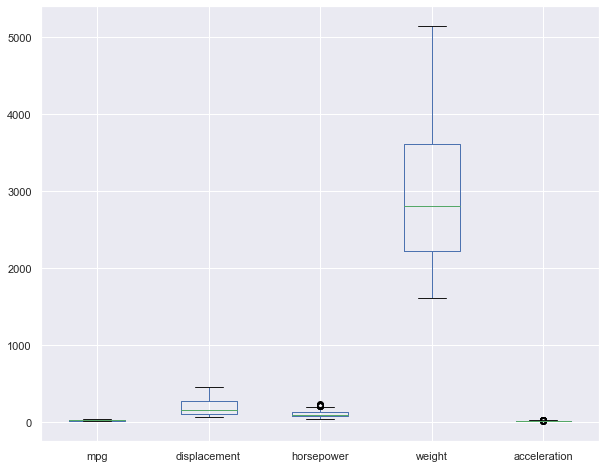

In [124]:
# Boxplots - visualize the minimum, with Seaborn
#first quartile, median, third quartile, and maximum

cars[numeric_vars].plot(kind='box')



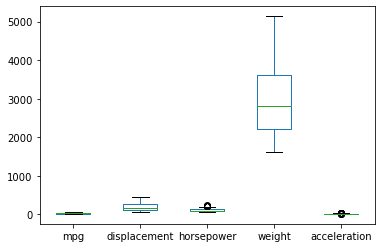

In [29]:
# Boxplots - visualize the minimum, with matplotlib
#first quartile, median, third quartile, and maximum

cars[numeric_vars].plot(kind='box')

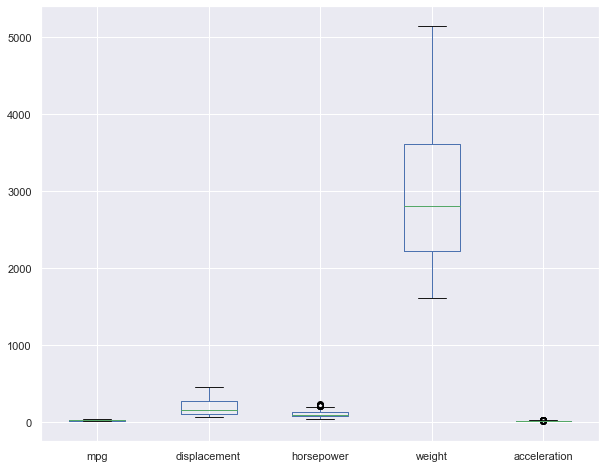

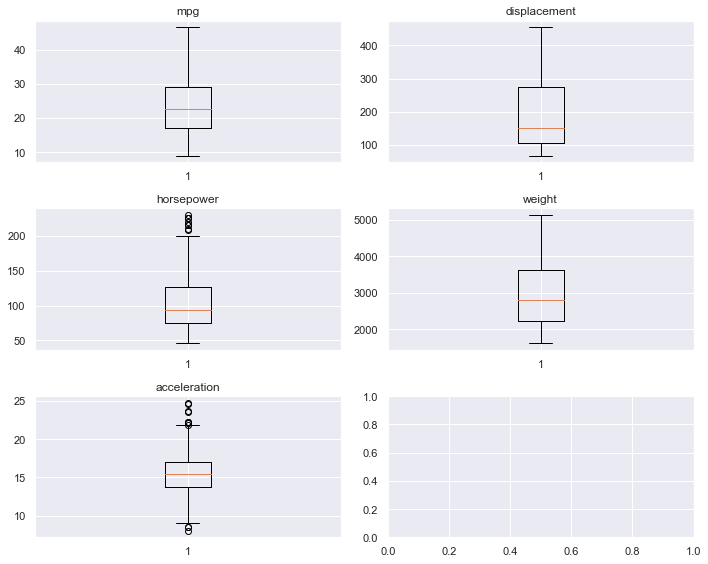

In [125]:
# To better visualize the boxplots, let's plot them one at a time. with Seaborn

cars[numeric_vars].plot(kind='box')
fig, axes = plt.subplots(3,2)
for ax, var in zip(axes.ravel(), numeric_vars):
    ax.boxplot(cars[var])
    ax.set_title(var)
plt.tight_layout()


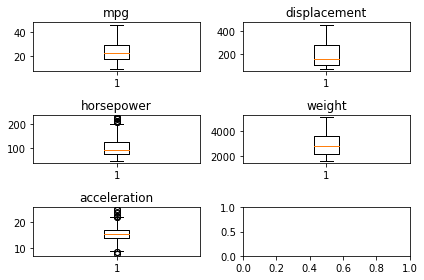

In [31]:
# To better visualize the boxplots, let's plot them one at a time. with matplotlib

cars[numeric_vars].plot(kind='box')
fig, axes = plt.subplots(3,2)
for ax, var in zip(axes.ravel(), numeric_vars):
    ax.boxplot(cars[var])
    ax.set_title(var)
plt.tight_layout()

### Univariate - Categorical

Text(0, 0.5, 'frequency')

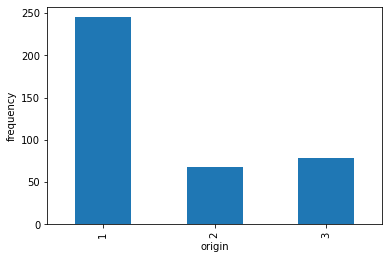

In [32]:
# Categorical
agg = cars.groupby('origin').apply(len)
agg.plot(kind='bar').set_ylabel('frequency')

Text(0, 0.5, 'average mpg')

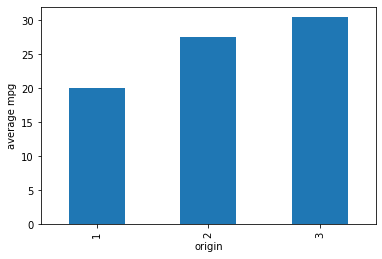

In [33]:
# Categorical vs Numeric
agg = cars.groupby('origin')['mpg'].mean()
agg.plot(kind='bar').set_ylabel('average mpg')

### Numeric vs Numeric

/Users/galvanize/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


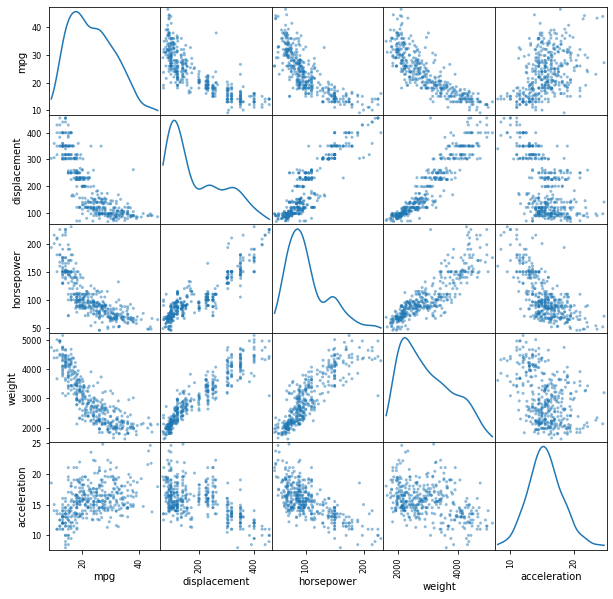

In [35]:
# Scatterplot matrix
from pandas.plotting import scatter_matrix
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = scatter_matrix(cars[numeric_vars], ax=ax, diagonal='kde')

Text(0, 0.5, 'average mpg')

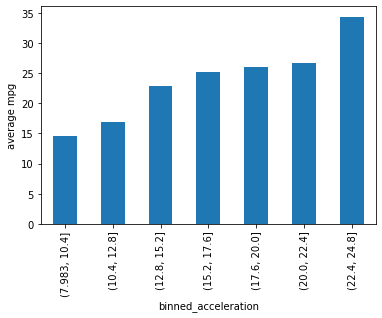

In [36]:
# Use binning to see relationships more clearly
cars['binned_acceleration'] = pd.cut(cars.acceleration, bins=7)
agg = cars.groupby('binned_acceleration')['mpg'].mean()
agg.plot(kind='bar').set_ylabel('average mpg')

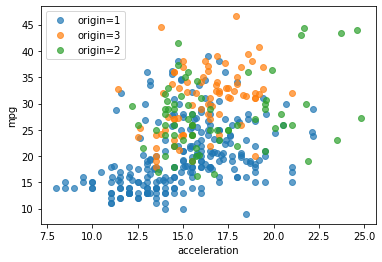

In [37]:
# Scatter plot by category
origins = cars['origin'].unique()
for origin in origins:
    plt.plot(cars.loc[cars.origin==origin,'acceleration'], 
             cars.loc[cars.origin==origin,'mpg'], 
             linestyle='',
             marker='o',
             alpha=.7,
             label="origin="+origin)
plt.xlabel('acceleration')
plt.ylabel('mpg')
plt.legend(numpoints=1)

In [38]:
# Categorical vs Categorical
pd.crosstab(cars['origin'], cars['model'])

model,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
1,22,19,18,29,14,20,22,18,22,23,6,13,19
2,5,4,5,7,6,6,8,4,6,4,8,3,2
3,2,4,5,4,6,4,4,6,8,2,13,12,9


Aha! Model means model year --- we probably should have left this as numeric

Text(0.5, 1.0, 'MPG by origin and model year')

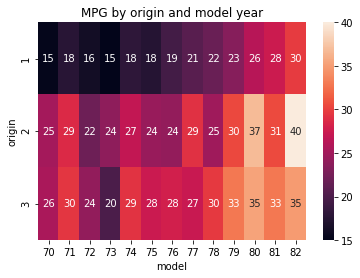

In [30]:
# Heat-map
import seaborn as sns

agg = cars.groupby(['origin','model'])['mpg'].mean()
ax = sns.heatmap(agg.unstack(level='model'), annot=True)
ax.set_title('MPG by origin and model year')

## Linear Regression

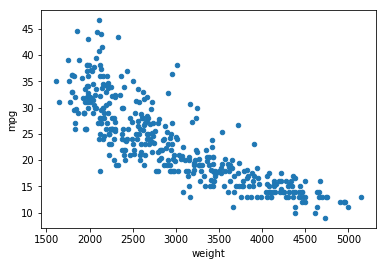

In [31]:
# Single variable regression
cars.plot('weight','mpg',kind='scatter')

Linear regression is just the fancy term for finding the line of best fit. If I was going to eyeball it from this data, I would draw the line from (1000,40) through (5500,5).

In other words, we are looking for the slope and intercept that defines a line that fits the data as well as possible.

'As well as possible' means that we are trying to minimize the mean-squared-error

-0.010000000000000002 55.00000000000001


(1000, 5500)

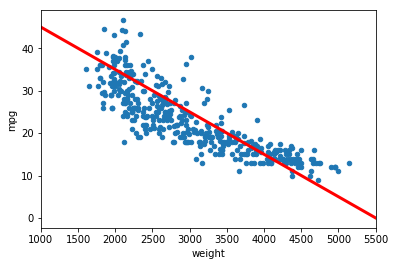

In [32]:
# Make a guess at the line of best fit
first_point = [1000,45]
second_point = [5500, 0]

# Solve 
def get_line_equation(p1, p2):
    """
    Solve the system of equations:
    y1 = m*x1 + b
    y2 = m*x2 + b
    
    Input:
    p1: first point [x1, y1]
    p2: second point [x2, y2]
    
    returns: slope, intercept
    """
    X = [[p1[0], 1], [p2[0], 1]]
    y = [[p1[1]], [p2[1]]]
    soln = np.linalg.solve(X,y)
    return  soln[0][0], soln[1][0]

slope, intercept = get_line_equation(first_point, second_point)

print(slope, intercept)

# Plot the line along with the data
ax = cars.plot('weight','mpg',kind='scatter')
xx = np.linspace(1000, 5500, 100)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
ax.set_xlim([1000,5500])

How can we measure the error? The typical choice is to use mean squared error. The error for a given data point is the difference between the observed value and the predicted value
$$
MSE := \frac{1}{n} \sum_{i=1}^n (y_i - (mx_i + b))^2
$$


In [33]:
# Mean Squared Error

def mean_squared_error(X, y, m, b):
    """
    Compute the mean squared error, on the data (X,y), 
    of the model defined by slope m, and intercept b.
    """
    pred = X*m + b
    error = y - pred
    mse = np.mean(error**2)
    return mse

mean_squared_error(cars['weight'], cars['mpg'], slope, intercept)

25.82198188775511

## R-Squared

Mean squared error is a good error metric, but it is not comparable across different data sets. For this we use a scaled version called $R^2$. 
\begin{align}
    R^2 &:= 1 - \frac{SS_{res}}{SS_{tot}} \\
    &= 1 - \frac{\sum_{i=1}^n (y_i - (mx_i + b))^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
\end{align}    

Where $SS_{res}$ is the sum of the squared residuals and $SS_{tot}$ is the total sum of squares. $R^2$ can be interpreted as the fraction of the variance in the data that is explained by the model.

$R^2$ will be between 0 and 1. 0 means that your model explains none of the variance in the data, while 1 means your model explains all of the variance in the data. The higher $R^2$, the better!

In [34]:
# Calculate r-squared

def r_squared(X, y, m, b):
    """
    Compute the r-squared, on the data (X,y), 
    of the model defined by slope m, and intercept b.
    """
    pred = X*m + b
    resid = y - pred
    rsquared = 1 - np.sum(resid**2)/np.sum((y-y.mean())**2)
    return rsquared

r_squared(cars['weight'], cars['mpg'], slope, intercept)
    

0.575035909346501

## Ordinary least squares
It turns out that we can find the slope and intercept which *minimize* the mean squared error, using a procedure called ordinary least squares

Ordinary least squares is implemented in the *statsmodels* package. The advantage of *statsmodels* is that we also have access to a number of *regression diagnostics* that help us understand if this model might be good for UNDERSTANDING as well as PREDICTION.

In [32]:
'''
Recall that the form of a straight line is y = m * x + b. 
Statsmodels will compute m by default for your regression. 
But (don't ask) it DOES NOT COMPUTE b by default. It omits 'b'!!!!!!!!
If 'b' is omitted, that implies b = 0, so the line must pass through the origin (0,0)! 

You almost never want b=0 when you do a regression.
So, to force statsmodels to compute both 'm' and 'b', you must use the sm.add_constant function on your predictors (x)
'''

import statsmodels.api as sm
#for example, let's do a regression of weight (predictor) versus mpg(target output)
X = pd.DataFrame({'weight' : cars['weight']})


In [33]:
X

,weight
0,3504.0
1,3693.0
2,3436.0
3,3433.0
4,3449.0
...,...
393,2790.0
394,2130.0
395,2295.0
396,2625.0


In [35]:
#now we need to change our predictor matrix X to tell statsmodels to also calculate the intercept 'b'
# To do that, we need to add a column of ones to our data (why? see definition of matrix multiplication)
X = sm.add_constant(X)
X


,const,weight
0,1.0,3504.0
1,1.0,3693.0
2,1.0,3436.0
3,1.0,3433.0
4,1.0,3449.0
...,...,...
393,1.0,2790.0
394,1.0,2130.0
395,1.0,2295.0
396,1.0,2625.0


In [36]:
#so, all together now. let's do a regression of weight (predictor) versus mpg(target output)
import statsmodels.api as sm
X = pd.DataFrame({'weight' : cars['weight']})
X = sm.add_constant(X) # as described above, this line forces statsmodels to solve for both 'm' and 'b'!
y = cars['mpg']

# Use statsmodels to create a linear regression object
regressor = sm.OLS(y,X)
regressor = regressor.fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          6.02e-102
Time:                        09:30:43   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#check out that summary!!!!
#if you Google "what does the ols output from statsmodels mean", you will go down a rabbit hole 

# https://datatofish.com/statsmodels-linear-regression/
# https://blog.datarobot.com/ordinary-least-squares-in-python
# https://python.quantecon.org/ols.html
# https://heartbeat.fritz.ai/implementing-ordinary-least-squares-ols-using-statsmodels-in-python-b1f4dee09419

In [67]:
dir(regressor)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


## Model Diagnostics

**coef** - The values of the coefficients in the model

**$P>|t|$** - The p-value of the null hypothesis that a specific parameter is zero.

**R-Squared** - Proportion of variance explained by the model. Measured on a scale from 0 (bad) to 1 (good)

**Prob (F-statistic)** - p-value of the F-statistic. This is the probability of the null hypothesis that *all parameters in the model are zero*

(1000, 5500)

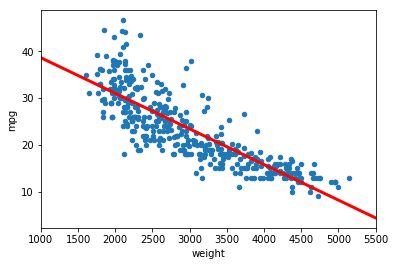

In [36]:
# Plot the line along with the data
slope = -.0076
intercept = 46.2165
ax = cars.plot('weight','mpg',kind='scatter')
xx = np.linspace(1000, 5500, 100)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
ax.set_xlim([1000,5500])

This line is a better fit than our original guess. We can tell because its $R^2$ is higher, meaning it explains the mpg's variance better. The MSE of this fit will be lower (better) than our original guess as well.

In [ ]:
# use weight-squared as a new column

In [13]:
import statsmodels.api as sm
X = pd.DataFrame({'weight' : cars['weight']})
X = sm.add_constant(X)
y = cars['mpg']

In [14]:
X['weight-squared'] = X['weight'].apply(lambda x: x*x) #explicitly makes new column

In [15]:
X

,const,weight,weight-squared
0,1.0,3504.0,12278016.0
1,1.0,3693.0,13638249.0
2,1.0,3436.0,11806096.0
3,1.0,3433.0,11785489.0
4,1.0,3449.0,11895601.0
...,...,...,...
393,1.0,2790.0,7784100.0
394,1.0,2130.0,4536900.0
395,1.0,2295.0,5267025.0
396,1.0,2625.0,6890625.0


In [18]:
#Linear Regression of MPG against Weight
import statsmodels.api as sm
X = pd.DataFrame({'weight' : cars['weight']})
X = sm.add_constant(X) # as described above, this line forces statsmodels to solve for both 'm' and 'b'!
y = cars['mpg']

# Use statsmodels to create a linear regression object
regressor = sm.OLS(y,X)
regressor = regressor.fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          2.97e-103
Time:                        14:40:49   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# TASK: Made a model that depends does a linear regression of mpg against Weight and weight ^2

In [17]:
#solution 1 - #explicitly makes new column in X

import statsmodels.api as sm
X = pd.DataFrame({'weight' : cars['weight']})
X = sm.add_constant(X)
y = cars['mpg']
X['weight-squared'] = X['weight'].apply(lambda x: x*x) 
regressor = sm.OLS(y,X)
regressor = regressor.fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     495.0
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          2.49e-108
Time:                        14:37:11   Log-Likelihood:                -1132.9
No. Observations:                 398   AIC:                             2272.
Df Residuals:                     395   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             62.5167      2.971     21.042      0.000      56.676      68.358
weight            -0.0186      0.002     -9.517      0.000      -0.022      -0.015
weight-squared  1.717e-06   3.04e-07      5.643      0.000    1.12e-06    2.31e-06
==============================================================================
Omnibus:                       51.743   Durbin-Watson:                   0.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.990
Skew:                           0.784   Prob(JB):                     7.82e-20
Kurtosis:                       4.688   Cond. No.                     1.56e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#Solution #2  - Using code from insects.ipynb as a model

import statsmodels.formula.api as smf
X = pd.DataFrame({'weight' : cars['weight'], 'mpg': cars['mpg']})
linear_model = smf.ols(formula='mpg ~ weight + I(weight**2)',
                       data=X)
fitted_model = linear_model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     495.0
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          2.49e-108
Time:                        14:47:45   Log-Likelihood:                -1132.9
No. Observations:                 398   AIC:                             2272.
Df Residuals:                     395   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         62.5167      2.971     21.042      0.000      56.676      68.358
weight            -0.0186      0.002     -9.517      0.000      -0.022      -0.015
I(weight ** 2)  1.717e-06   3.04e-07      5.643      0.000    1.12e-06    2.31e-06
==============================================================================
Omnibus:                       51.743   Durbin-Watson:                   0.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.990
Skew:                           0.784   Prob(JB):                     7.82e-20
Kurtosis:                       4.688   Cond. No.                     1.56e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#go back to cars
cars = cars[cars.horsepower.notna()]
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model           392 non-null int64
origin          392 non-null int64
car_name        392 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [28]:
linear_model = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + model + origin',
                       data=cars)

fitted_model = linear_model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          2.04e-139
Time:                        15:20:48   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
model            0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
#acceleration
linear_model = smf.ols(formula='mpg ~  acceleration',
                       data=cars)

fitted_model = linear_model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     85.15
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           1.78e-18
Time:                        15:30:08   Log-Likelihood:                -1322.5
No. Observations:                 392   AIC:                             2649.
Df Residuals:                     390   BIC:                             2657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.8332      2.048      2.359      0.019       0.806       8.861
acceleration     1.1976      0.130      9.228      0.000       0.942       1.453
==============================================================================
Omnibus:                       16.649   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.415
Skew:                           0.492   Prob(JB):                     0.000165
Kurtosis:                       2.684   Cond. No.                         90.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
linear_model = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + model + origin',
                       data=cars)

fitted_model = linear_model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     294.6
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          1.58e-140
Time:                        15:40:52   Log-Likelihood:                -1023.8
No. Observations:                 392   AIC:                             2062.
Df Residuals:                     385   BIC:                             2089.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -15.5635      4.175     -3.728      0.000     -23.773      -7.354
cylinders       -0.5067      0.323     -1.570      0.117      -1.141       0.128
displacement     0.0193      0.007      2.579      0.010       0.005       0.034
horsepower      -0.0239      0.011     -2.205      0.028      -0.045      -0.003
weight          -0.0062      0.001    -10.883      0.000      -0.007      -0.005
model            0.7475      0.051     14.717      0.000       0.648       0.847
origin           1.4282      0.278      5.138      0.000       0.882       1.975
==============================================================================
Omnibus:                       35.376   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.123
Skew:                           0.559   Prob(JB):                     3.24e-14
Kurtosis:                       4.597   Cond. No.                     7.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
linear_model = smf.ols(formula='mpg ~ displacement + horsepower + weight + acceleration + model + origin',
                       data=cars)

fitted_model = linear_model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     293.1
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          3.63e-140
Time:                        15:46:21   Log-Likelihood:                -1024.7
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     385   BIC:                             2091.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -18.4728      4.579     -4.034      0.000     -27.476      -9.470
displacement     0.0123      0.006      2.181      0.030       0.001       0.023
horsepower      -0.0144      0.014     -1.049      0.295      -0.041       0.013
weight          -0.0066      0.001    -10.188      0.000      -0.008      -0.005
acceleration     0.0882      0.099      0.892      0.373      -0.106       0.283
model            0.7520      0.051     14.728      0.000       0.652       0.852
origin           1.3843      0.277      4.993      0.000       0.839       1.929
==============================================================================
Omnibus:                       30.620   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.396
Skew:                           0.521   Prob(JB):                     1.88e-11
Kurtosis:                       4.392   Cond. No.                     8.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### NOTE: ABOVE I DID NOT EXPLICITLY USE THE CATEGORICAL VARIABLES AS CATEGORICAL. I WILL DO SO HERE!

In [2]:
numeric_vars = ['mpg','displacement','horsepower','weight','acceleration']
categorical_vars = ['model', 'origin', 'cylinders']

In [25]:
#use all the variables and explicitly mark the categorical ones in the with C()
# also restored the weight**2 term in the model

import pandas as pd
import statsmodels.formula.api as smf

cars = pd.read_csv('DATA/cars_multivariate.csv',na_values=['?'])
cars = cars[cars.horsepower.notna()]

formula = 'mpg ~ displacement + horsepower + weight + I(weight**2) +acceleration  + C(origin) + C(cylinders) + C(model)'
linear_model = smf.ols(formula=formula, data=cars)
fitted_model = linear_model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     136.4
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          1.71e-164
Time:                        17:57:29   Log-Likelihood:                -919.43
No. Observations:                 392   AIC:                             1887.
Df Residuals:                     368   BIC:                             1982.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            52.1087      3.299     15.796      0.000      45.622      58.596
C(origin)[T.2]        1.2832      0.475      2.701      0.007       0.349       2.217
C(origin)[T.3]        1.3352      0.469      2.850      0.005       0.414       2.257
C(cylinders)[T.4]     6.2061      1.409      4.404      0.000       3.435       8.978
C(cylinders)[T.5]     7.3739      2.141      3.443      0.001       3.163      11.585
C(cylinders)[T.6]     5.2427      1.566      3.349      0.001       2.164       8.321
C(cylinders)[T.8]     5.6242      1.804      3.117      0.002       2.076       9.172
C(model)[T.71]       -0.2353      0.759     -0.310      0.757      -1.727       1.257
C(model)[T.72]       -0.7081      0.736     -0.962      0.337      -2.156       0.740
C(model)[T.73]       -1.1855      0.665     -1.784      0.075      -2.492       0.121
C(model)[T.74]        0.4424      0.788      0.561      0.575      -1.107       1.992
C(model)[T.75]        0.6812      0.767      0.888      0.375      -0.827       2.189
C(model)[T.76]        1.2487      0.735      1.700      0.090      -0.196       2.693
C(model)[T.77]        2.5786      0.752      3.428      0.001       1.099       4.058
C(model)[T.78]        2.9790      0.713      4.176      0.000       1.576       4.382
C(model)[T.79]        4.9125      0.755      6.506      0.000       3.428       6.397
C(model)[T.80]        9.0858      0.801     11.340      0.000       7.510      10.661
C(model)[T.81]        6.2251      0.791      7.868      0.000       4.669       7.781
C(model)[T.82]        7.7600      0.778      9.979      0.000       6.231       9.289
displacement          0.0078      0.006      1.260      0.208      -0.004       0.020
horsepower           -0.0385      0.012     -3.229      0.001      -0.062      -0.015
weight               -0.0181      0.002    -11.143      0.000      -0.021      -0.015
I(weight ** 2)     2.038e-06    2.4e-07      8.503      0.000    1.57e-06    2.51e-06
acceleration         -0.0282      0.080     -0.354      0.723      -0.185       0.128
==============================================================================
Omnibus:                       35.962   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.356
Skew:                           0.401   Prob(JB):                     9.79e-23
Kurtosis:                       5.358   Cond. No.                     3.11e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Note that when you tell statsmodels that something is a categorial variable, it makes multiple dummy variables out of it!
